In [1]:
from utils.RunConcatenateExperiment import RunConcatenateExperiment

from models.UrlsEmbedding import Clustering_algorithm, Scale

%matplotlib inline

In [46]:
direct = "/Volumes/Macintosh HD/Users/Andrea/Desktop/"

site = "cs.stanford.edu" # cs.illinois.edu  cs.ox.ac.uk  cs.priceton.edu  cs.stanford.edu
type_site = "NoConstraint" # ListConstraint  NoConstraint

db_best_left_with_b = "1000000" # 100000 = 100K ; 500000 = 500K ; 1000000 = 1M
window_best_left_with_b = "7" # 2 3 5 7
depth_best_left_with_b = "20" # 10 15 20
iteractions_left_with_b = "3" # 50 10 3
                 
db_best_normal = "500000" # 100000 = 100K ; 500000 = 500K ; 1000000 = 1M
window_best_normal = "3" # 2 3 5 7
depth_best_normal = "20" # 10 15 20
iteractions_normal = "10" # 50 10 3

use_tfidf = True
dimension_deduction = 100

clustering = Clustering_algorithm.HDBscan
intersect = True
                 
scaling = Scale.l2
separator = "\t"

In [47]:
%time e = RunConcatenateExperiment(direct, site, type_site, db_best_left_with_b, window_best_left_with_b, depth_best_left_with_b, iteractions_left_with_b, db_best_normal, window_best_normal, depth_best_normal, iteractions_normal, clustering, use_tfidf, int(dimension_deduction), separator, scaling, intersect)

scaling embeddings with L2 normalization
scaling embeddings with L2 normalization
use tfidf
Fitting tfidf...


Create tf-idf matrix, shape:  (436, 949)
Performing lsa dimensional reduction with dimension=100


Dimensionality reduction with lsa, shape:  (436, 100)
scaling embeddings with L2 normalization
Intersecting...
Original urls: 167
Intersected urls: 161
Original urls: 161
Intersected urls: 161
Concatenating...
Start running HDBscan
Start running HDBscan
Homogeneity: 0.171406769032
Completeness: 0.49257325974
V-Measure core: 0.254316055619
Adjusted Rand index: 0.08300057950060401
Mutual Information: 0.143215467864
Silhouette: -0.00356883443674
Homogeneity: 0.187323265519
Completeness: 0.620065260767
V-Measure core: 0.287724300508
Adjusted Rand index: 0.08842149546199686
Mutual Information: 0.160659785963
Silhouette: -0.0164089569818
CPU times: user 5.21 s, sys: 155 ms, total: 5.37 s
Wall time: 5.38 s


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:193: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 161 but corresponding boolean dimension is 140
  a = np.mean(distances_row[mask])
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:219: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 161 but corresponding boolean dimension is 140
  for cur_label in set(labels) if not cur_label == label])


In [52]:
print("Metrics WITH B VALUE")

e.get_dataframe_left_with_b_doc2vec()

Metrics WITH B VALUE


,Adj Mutual info,Adj Rand index,Completeness,Homogeneity,Silhouette,V-Measure
HDBScan,0.14,0.08,0.49,0.17,-0.00,0.25


In [53]:
print("Metrics NORMAL")

e.get_dataframe_normal_doc2vec()

Metrics NORMAL


,Adj Mutual info,Adj Rand index,Completeness,Homogeneity,Silhouette,V-Measure
HDBScan,0.16,0.09,0.62,0.19,-0.02,0.29


normal_TFIDF


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

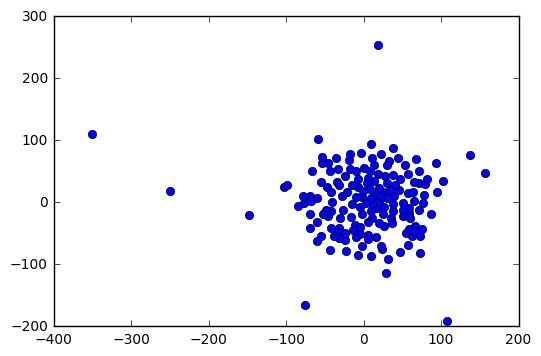

In [50]:
direct = direct + site + "/" + type_site + "/"
if use_tfidf:
    string = "TFIDF"
else:
    string = "doc2vec"

print("normal_" + string)

e.plot_normalized_normal_doc2vec(direct + "normal_" + string + "_" + clustering.value)

left_with_b_TFIDF


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

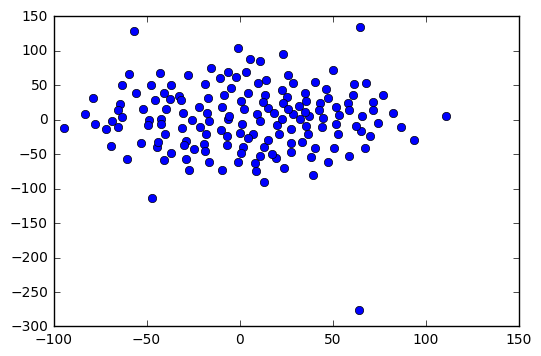

In [51]:
print("left_with_b_" + string)

e.plot_normalized_left_with_b_doc2vec(direct + "left_with_b_" + string + "_" + clustering.value)